<h1>IBM Statistic Analytic</h1>

<p>The below data relates to the IBM HR data, and the purpose of using this information is to try to gain some insight into why people are leaving and if there is any indicator based on the data who would leave. A hypothsis that relates to the data and that can be proven by the data is: "Employees who have a higher level of job satisfaction and are paid higher salaries are less likely to leave the company compared to employees who have lower job satisfaction and lower salaries". This model can then be applied to other companies so that it can be used to help with adjusting work conditions. </p>

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data for the employee attrition is found at "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download"
# Load the data
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Remove unnecessary columns
data.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1, inplace=True)

# Drop duplicates
data.drop_duplicates(inplace=True)

# Impute missing values in Age with median
data["Age"].fillna(data["Age"].median(), inplace=True)

# Drop EmployeeNumber column
data.drop("EmployeeNumber", axis=1, inplace=True)

# Change Education to categorical variable
data["Education"] = data["Education"].astype("category")

# Rename columns for clarity
data.rename(columns={"JobSatisfaction": "JobSatisfactionScore",
                     "PercentSalaryHike": "SalaryHikePercent"}, inplace=True)



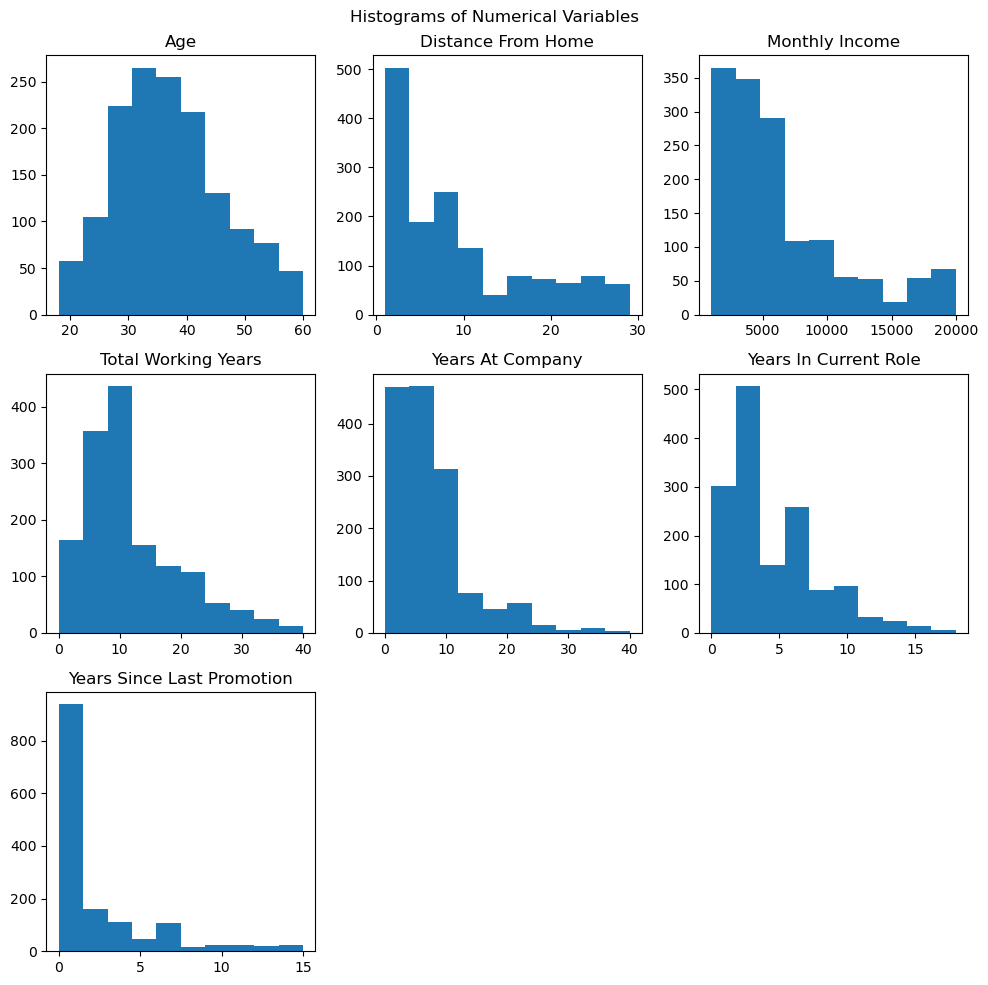

In [105]:
# Remove highly correlated features
data.drop(["YearsWithCurrManager", "JobInvolvement", "NumCompaniesWorked", "RelationshipSatisfaction", "TrainingTimesLastYear"], axis=1, inplace=True)

# Plot histograms for numerical variables
plt.figure(figsize=(10, 10))
plt.suptitle("Histograms of Numerical Variables")
plt.subplot(331)
plt.hist(data["Age"])
plt.title("Age")
plt.subplot(332)
plt.hist(data["DistanceFromHome"])
plt.title("Distance From Home")
plt.subplot(333)
plt.hist(data["MonthlyIncome"])
plt.title("Monthly Income")
plt.subplot(334)
plt.hist(data["TotalWorkingYears"])
plt.title("Total Working Years")
plt.subplot(335)
plt.hist(data["YearsAtCompany"])
plt.title("Years At Company")
plt.subplot(336)
plt.hist(data["YearsInCurrentRole"])
plt.title("Years In Current Role")
plt.subplot(337)
plt.hist(data["YearsSinceLastPromotion"])
plt.title("Years Since Last Promotion")
plt.tight_layout()



<p>The above are graphs of the numerical values and it is noted that there is a lower amount of people who haven't waited long for promotions as well as a higher amount of people who make less and have been at the company a shorter time. What is interesting is this does not properly correlate to the number of years at the company which is something that the company could potentially look into.</p> 

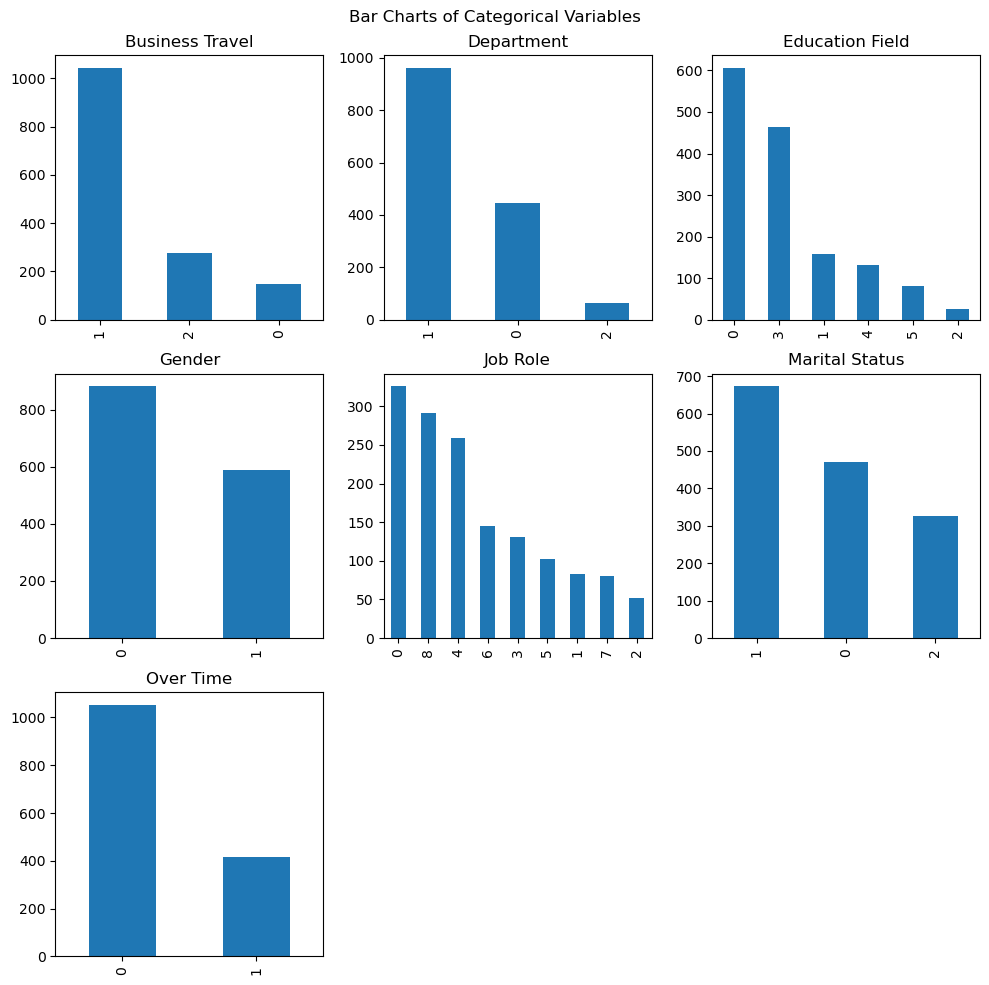

In [106]:
# Plot bar charts for categorical variables
plt.figure(figsize=(10, 10))
plt.suptitle("Bar Charts of Categorical Variables")
plt.subplot(331)
data["BusinessTravel"].value_counts().plot(kind="bar")
plt.title("Business Travel")
plt.subplot(332)
data["Department"].value_counts().plot(kind="bar")
plt.title("Department")
plt.subplot(333)
data["EducationField"].value_counts().plot(kind="bar")
plt.title("Education Field")
plt.subplot(334)
data["Gender"].value_counts().plot(kind="bar")
plt.title("Gender")
plt.subplot(335)
data["JobRole"].value_counts().plot(kind="bar")
plt.title("Job Role")
plt.subplot(336)
data["MaritalStatus"].value_counts().plot(kind="bar")
plt.title("Marital Status")
plt.subplot(337)
data["OverTime"].value_counts().plot(kind="bar")
plt.title("Over Time")
plt.tight_layout()



<p> The above is the graphing of the categorical data which shows some interesting insights. Most people barely travel and tend to work more in development departments than sales. However, there are a larger portion of people who work in the Sales Exectutive job role, which again is expected for a company as they would need more sales people than not to sell products </p>

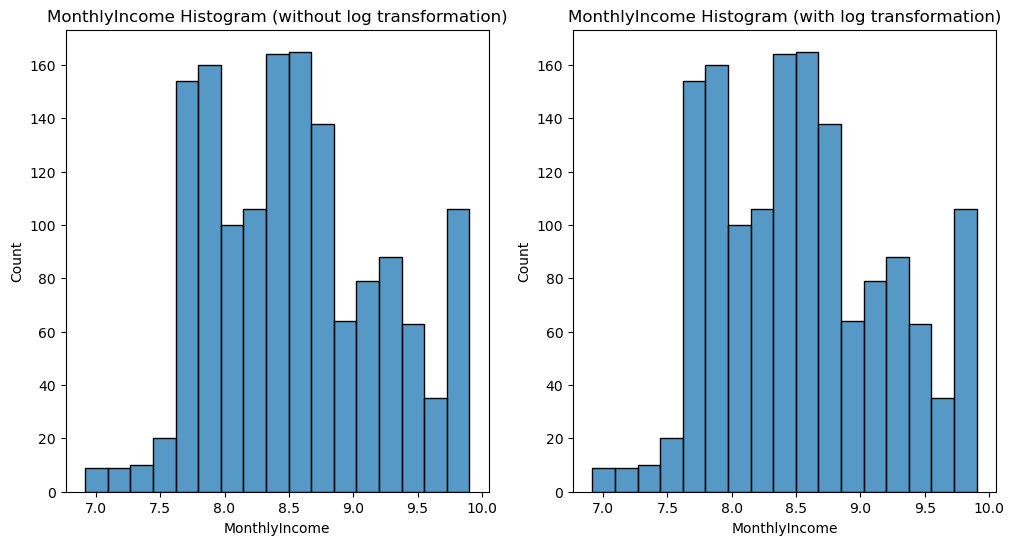

In [107]:
# Apply log transformation to MonthlyIncome
data["MonthlyIncome"] = np.log(data["MonthlyIncome"])

# Plot histogram of MonthlyIncome with and without log transformation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=data, x="MonthlyIncome", ax=axs[0])
axs[0].set_title("MonthlyIncome Histogram (without log transformation)")

sns.histplot(data=data, x="MonthlyIncome", ax=axs[1])
axs[1].set_title("MonthlyIncome Histogram (with log transformation)")

plt.show()



<p> The purpose of this data is to show the monthly income graphed. However, in order to make the skewed data easier to read I performed a log transformation over the data. It helps to adjust the skewed data by compressing it to a degree. It indicates that there is a decent spread of monthly income but there is a top heavy salary issue. This is expected as C suite execs will always make more</p>

In [108]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the data splits as CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

# Print the shape of the data splits
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (1176, 26)
Testing data shape: (294, 26)


<h3>Milestone 2</h3>

<p>One thing that I think should be done to the data is to remove the "distance from home" and "total working years" as I don't believe that they are as impactful of information. The reason being in 2023 due in part to the COVID-19 pandemic, a lot of companies switched to a WFH or hybrid model which both is advantageous and disadvantageous for the employee. Therefore, the distance from home is less of a concern and probably won't be as impactful as it would've been pre-pandemic. Second, the total working years, while yes some turnover could be attributable to retirement I don't believe this is something that should be considered.</p>

In [109]:
data.drop("DistanceFromHome",axis=1,inplace=True)

In [110]:
data.drop("TotalWorkingYears",axis=1,inplace=True)

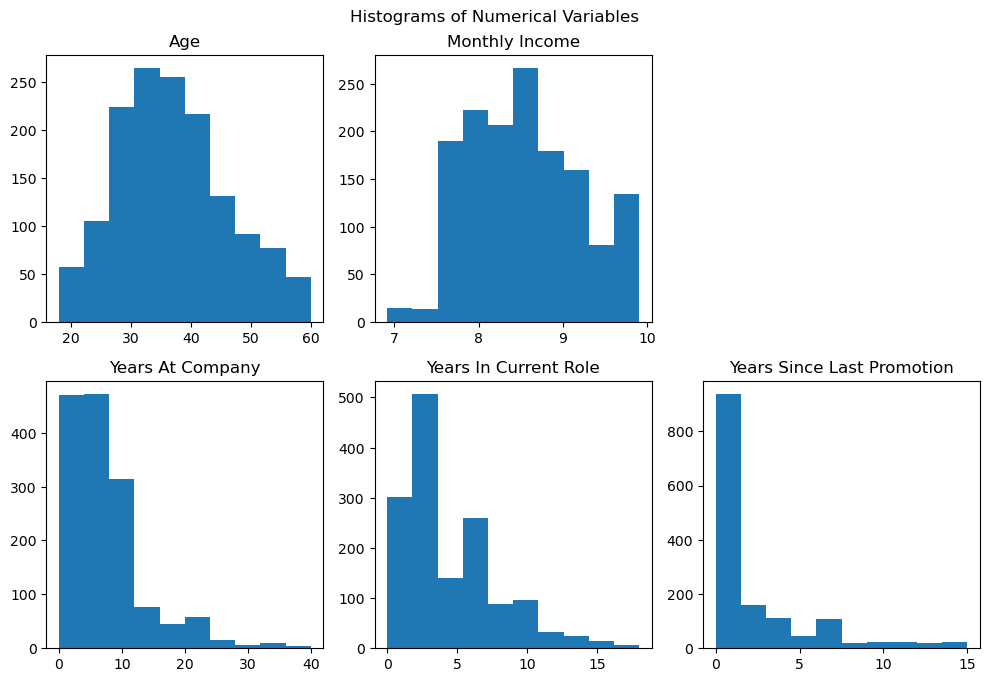

In [111]:
# Plot histograms for numerical variables
plt.figure(figsize=(10, 10))
plt.suptitle("Histograms of Numerical Variables")
plt.subplot(331)
plt.hist(data["Age"])
plt.title("Age")
plt.subplot(332)
plt.hist(data["MonthlyIncome"])
plt.title("Monthly Income")
plt.subplot(334)
plt.hist(data["YearsAtCompany"])
plt.title("Years At Company")
plt.subplot(335)
plt.hist(data["YearsInCurrentRole"])
plt.title("Years In Current Role")
plt.subplot(336)
plt.hist(data["YearsSinceLastPromotion"])
plt.title("Years Since Last Promotion")
plt.tight_layout()


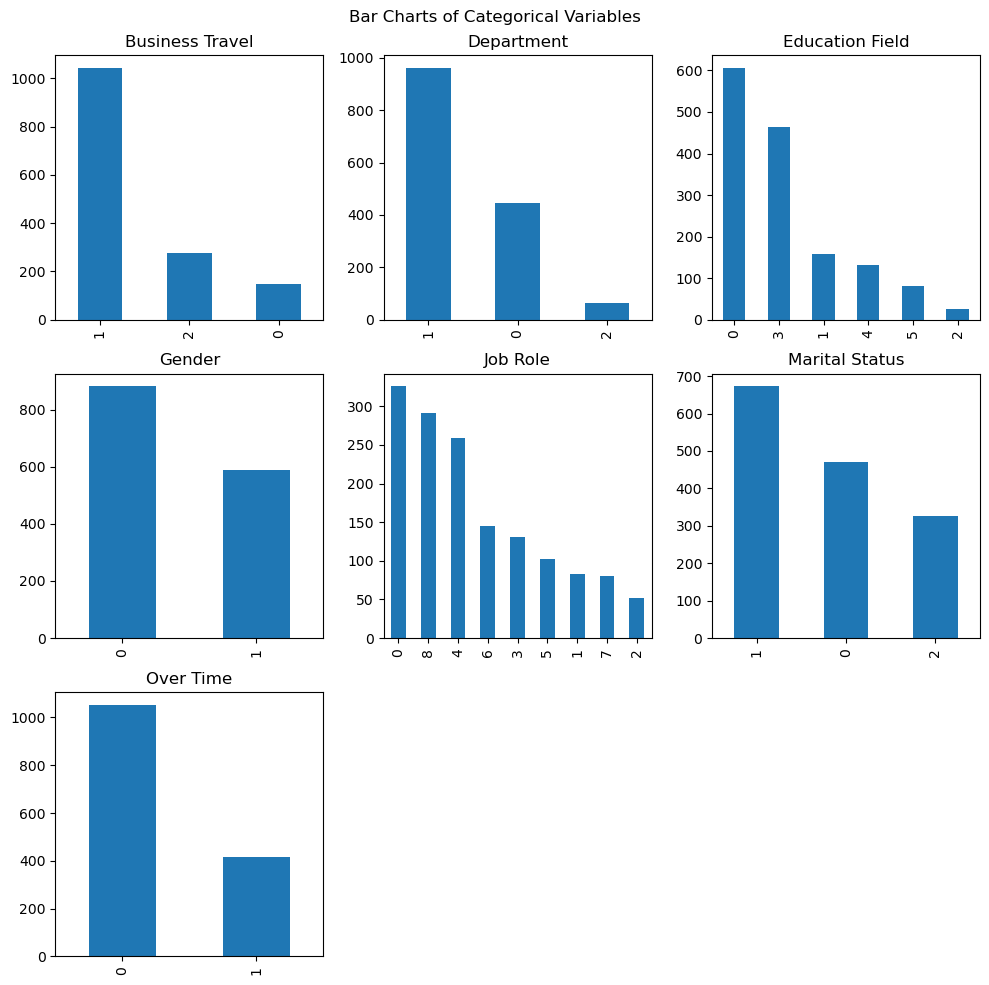

In [112]:
# Plot bar charts for categorical variables
plt.figure(figsize=(10, 10))
plt.suptitle("Bar Charts of Categorical Variables")
plt.subplot(331)
data["BusinessTravel"].value_counts().plot(kind="bar")
plt.title("Business Travel")
plt.subplot(332)
data["Department"].value_counts().plot(kind="bar")
plt.title("Department")
plt.subplot(333)
data["EducationField"].value_counts().plot(kind="bar")
plt.title("Education Field")
plt.subplot(334)
data["Gender"].value_counts().plot(kind="bar")
plt.title("Gender")
plt.subplot(335)
data["JobRole"].value_counts().plot(kind="bar")
plt.title("Job Role")
plt.subplot(336)
data["MaritalStatus"].value_counts().plot(kind="bar")
plt.title("Marital Status")
plt.subplot(337)
data["OverTime"].value_counts().plot(kind="bar")
plt.title("Over Time")
plt.tight_layout()

<h3>Milestone 3</h3>
<p> The model that I am going to leverage is the logistic regression model. Specifically because this model is good for being used to determine a relationship between two variables. The logisitic regression has a good degree of interperability and allows me to determine the impact of specific variables on the outcome.</p>

In [113]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()



In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Separate the target variable from the features in the testing dataset
X_test = test_data.drop("Attrition", axis=1)
y_test = test_data["Attrition"]

X_test = X_test[X_train.columns]


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Convert string labels to numerical values
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8673469387755102
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5


/Users/zach/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p>Based on the results provided by the model there was a decent degree of accuracy which is 86%, however given the other metrics of evaluation the model did have trouble. It has a ROC-AUC score of .5 indicating that it is no better than randomly guessing. Some retooling of the algorithm or reevaluation of the inputs used to measure this is needed</p>